<a href="https://colab.research.google.com/github/Gloria-16/MachineLearning/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<p align= "center" ><img src="https://drive.google.com/uc?id=1SUJ34ZcVl48gzXlsLm4-lvrA5-KgFG6f" widht="800"></p>


---
<p align= "center" >    MÓDULO III: Machine Learning. </p>

<p align= "center" > Team 28 </p>

------
**Integrantes:**
- Rosa Kareli Nava Reyes (Pasante de Física, UAEMÉX)
- Gloria Anahi Narvaez Hernandez (Pasante de Ing. Geofísica, UJAT)


**Fecha:** [13/02/2024]

------

# Ataques cardíacos
#### Las defunciones por enfermedades del corazón son una de las principales causas de muerte en el mundo, en particular en México las defunciones por enfermedades del corazón fueron la primera causa de muerte a nivel nacional, con 105 864 casos, según la estadística preliminar del INEGI publicada el 24 de enero de 2023.
#### Entre los síntomas más frecuentes de un ataque cardíaco se encuentran:
* Dolor en el pecho que puede sentirse como presión, opresión, dolor, o sensación opresiva o de dolor.
* Dolor o molestias que se propagan al hombro, al brazo, a la espalda, al cuello, a la mandíbula, a los dientes o, a veces, a la parte superior del abdomen.
* Sudor frío.
* Fatiga.
* Acidez estomacal o indigestión.
* Aturdimiento o mareos repentinos.
* Náusea.
* Falta de aire.
* Las mujeres pueden tener síntomas atípicos, como dolor punzante o breve en el cuello, el brazo o la espalda.


---

## Objetivo

  #### El objetivo del proyecto es predecir si el paciente es suseptible  a un ataque cardíaco.

  #### La base de datos fue recuperada de kaggle y se puede consultar en el siguiente link [Heart Attack Prediction](https://www.kaggle.com/datasets/juledz/heart-attack-prediction)

  #### El dataset contiene datos, de cuatro bases de datos distintas: Cleveland, Hungría, Suiza y Long Beach V.


---

▶ **Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.model_selection
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

In [ ]:
# Cargar el dataset
corazon = pd.read_csv('/content/heart.csv')
corazon.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


In [ ]:
# Conocer el tamaño del dataset
corazon.shape

(1025, 14)

#### El dataset cuenta con 1025 datos y 14 columnas que contienen la siguiente información  

| Columna    | Descripción|
|------------|------------|
| Indice     |   Numérico (p. ej., 1, 2, 3...)     |
| Edad     | Numérico (p. ej., 50)       |
| Sexo     | Categórico (0: Mujer, 1: Hombre)        |
| Tipo de dolor de pecho     | Categórico (0: Angina típica, 1: Angina atípica, 2: Dolor no anginoso, 3: Asintomático)           |
| Presión arterial en reposo     |    Numérico (p. ej., 125)        |
| Colesterol sérico     |    Numérico en mg/dL (p. ej., 212)        |
| Azácar en sangre en ayuno     |   Categórico (0: <= 120 mg/dL, 1: > 120 mg/dL)         |
| Resultados electrocardiográficos en reposo     |     Categórico (0 : Normal, 1: Anormalidad, 2: Hipertrofia)       |
| Frecuencia cardíaca máxima alcanzada     |    Numérica (p. ej., 168)        |
| Angina inducida por el ejercicio     |   Categórica (0: No, 1: Sí)         |
| Oldpeak (Depresión ST)    |     Numérica (p. ej., 1,0)       |
| Pendiente del segmento ST de ejercicio máximo    |    Categórico (0: ascendente, 1: plano, 2: descendente)        |
| Número de vasos principales coloreados por fluoroscopia    |   Numérico (0 a 3)         |
| Talasemia    |   Categórica (0: normal, 1: defecto fijo, 2: reversible Defecto): categórica (0: normal, 1: defecto fijo, 2: reversible Defecto)         |
|  Objetivo  |     Numérico (intervalo de 0 a 10)       |


#### Para facilitar el trabajo y comprensión de las variables del dataset se actualizan los nombres de las columnas
#### Definir un diccionario para mapear los nombres de las columnas antiguas a los nuevos nombres

In [ ]:
nuevos_nombres = {
    'age':'edad',
    'sex':'sexo',
    'cp':'tipo_dolor',
    'trestbps':'presion_art_reposo',
    'chol':'colesterol_serico',
    'fbs':'azucar_sangre',
    'restecg':'electrocardiograma',
    'thalach':'frec_max',
    'exang':'angina_inducida',
    'oldpeak':'depresion_st',
    'slope':'ejercicio_max',
    'ca':'fluroscopia',
    'thal':'talasemia',
    'target': 'objetivo'
  }

corazon.rename(columns=nuevos_nombres, inplace=True)
print("\nDataFrame con nuevos nombres de columnas:")
print(corazon)


DataFrame con nuevos nombres de columnas:
      edad  sexo  tipo_dolor  presion_art_reposo  colesterol_serico  \
0       52     1           0                 125                212   
1       53     1           0                 140                203   
2       70     1           0                 145                174   
3       61     1           0                 148                203   
4       62     0           0                 138                294   
...    ...   ...         ...                 ...                ...   
1020    59     1           1                 140                221   
1021    60     1           0                 125                258   
1022    47     1           0                 110                275   
1023    50     0           0                 110                254   
1024    54     1           0                 120                188   

      azucar_sangre  electrocardiograma  frec_max  angina_inducida  \
0                 0               

In [ ]:
# Obtenemos informacion sobre el dataset
corazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   edad                1025 non-null   int64  
 1   sexo                1025 non-null   int64  
 2   tipo_dolor          1025 non-null   int64  
 3   presion_art_reposo  1025 non-null   int64  
 4   colesterol_serico   1025 non-null   int64  
 5   azucar_sangre       1025 non-null   int64  
 6   electrocardiograma  1025 non-null   int64  
 7   frec_max            1025 non-null   int64  
 8   angina_inducida     1025 non-null   int64  
 9   depresion_st        1025 non-null   float64
 10  ejercicio_max       1025 non-null   int64  
 11  fluroscopia         1025 non-null   int64  
 12  talasemia           1025 non-null   int64  
 13  objetivo            1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


In [ ]:
# Verificar que no existan valores nulos
corazon.isna().sum()

edad                  0
sexo                  0
tipo_dolor            0
presion_art_reposo    0
colesterol_serico     0
azucar_sangre         0
electrocardiograma    0
frec_max              0
angina_inducida       0
depresion_st          0
ejercicio_max         0
fluroscopia           0
talasemia             0
objetivo              0
dtype: int64

In [ ]:
# Para empezar a conocer como se comportan los datos se realiza estadistica descriptiva
corazon.describe()

,edad,sexo,tipo_dolor,presion_art_reposo,colesterol_serico,azucar_sangre,electrocardiograma,frec_max,angina_inducida,depresion_st,ejercicio_max,fluroscopia,talasemia,objetivo
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


#### Observaciones
* En la categoría de edad se observa que el valor mínimo es de 29 años mientras el máximo es 77 años, en promedio los pacientes que presentan síntomas frecuentes tienes 54 años, sin embargo, es necesario analizar esta variable para verificar que el mínimo o máximo no sea un valor atípico.
* La presión arterial en reposo se encuentra en el intervalo 94 – 200. Debe considerarse que el dataset solo reporta un numero para la presión arterial en reposo, en general la presión arterial consta de la presión sistólica y la presión diastólica. Por lo que no se indica si el valor reportado corresponde a la presión sistólica o diastólica.
*El colesterol sérico se considera normal en 200 mg/dL, de la estadística descriptiva podemos observar que esta variable se encuentra en un rango 126 – 564, el tercer cuartil indica que el 75 de los datos se encuentran por debajo de 275, por lo que es necesario verificar la existencia de datos atípicos.
*  En algunas columnas no tiene sentido realizar estadística descriptiva, ya que se cuenta con valores binarios, por ejemplo, en la categoría de sexo, no tiene sentido un promedio, o conocer el valor máximo o mínimo, ya que solo se tiene 0 o 1.

##▶ **Valores atípicos**

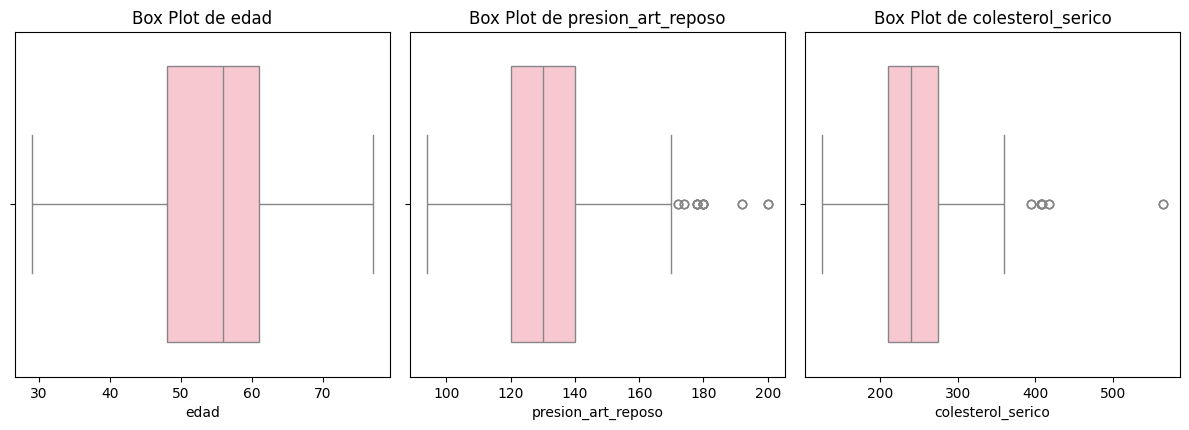

In [ ]:
valores_atipicos = corazon[['edad', 'presion_art_reposo', 'colesterol_serico']]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(valores_atipicos, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=corazon[feature], color='pink')
    plt.title(f'Box Plot de {feature}')

plt.tight_layout()
plt.show()

Los box plots permiten observar lo siguiente
  * El centro de distribución de la edad está sesgado negativamente porque el bigote y la mitad de la caja son más largos en el lado izquierdo de la mediana que en el lado derecho.
  * La distribución de la presión arterial en reposo es aproximadamente simétrica ya que ambas cajas tienen casi la misma longitud, aunque existen varios datos que sobresalen de los bigotes de la caja al lado derecho.
  * El centro de distribución del colesterol está sesgado positivamente, ya que el bigote y la mitad de la caja son más largos en el lado derecho de la mediana que en el lado izquierdo, además de tener datos que sobresalen de los bigotes de la caja en el lado derecho.


##▶ **Matriz de confusión para calcular la correlación entre las variables.**

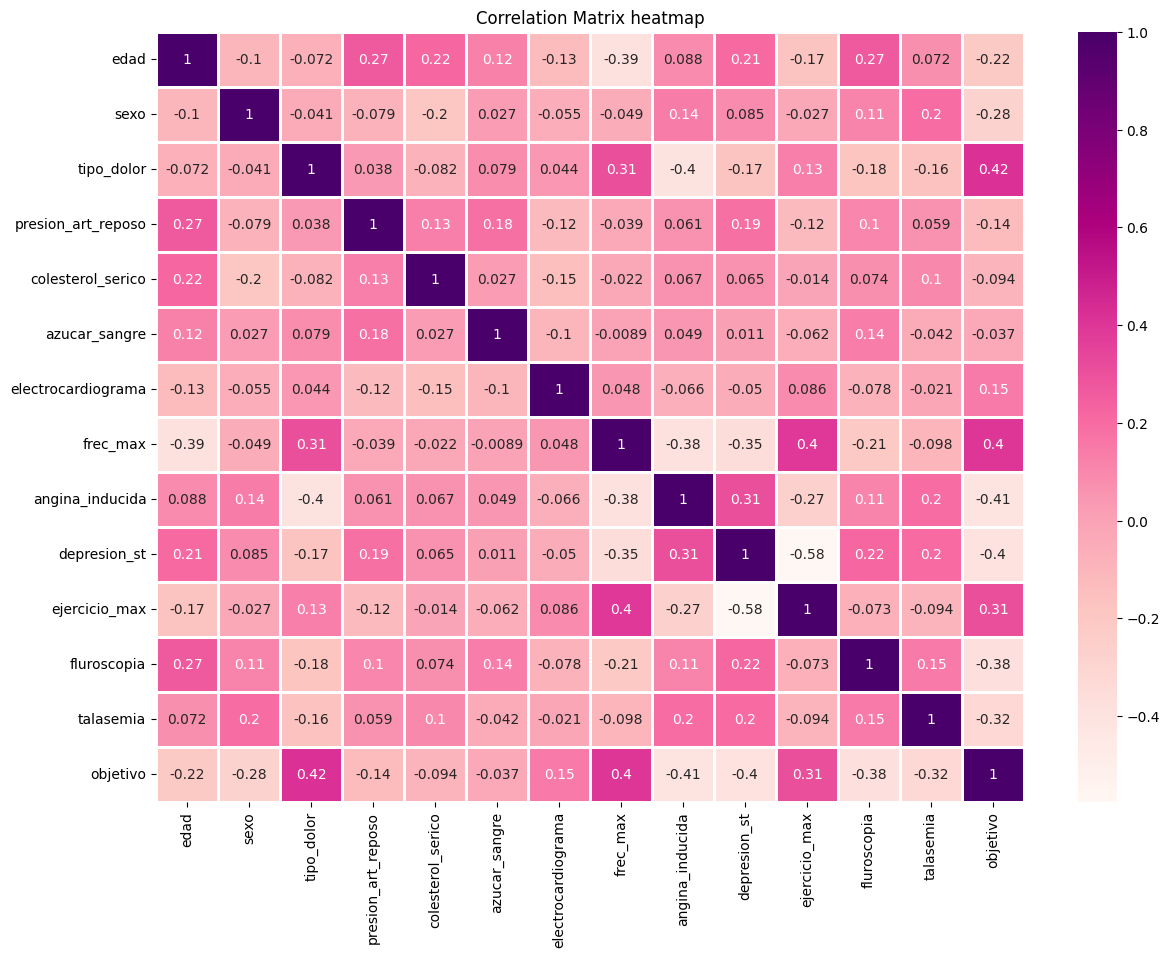

In [ ]:
correlation_matrix=corazon.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdPu", linewidths=.9)
plt.title('Correlation Matrix heatmap')
plt.show()

▶ Observaciones de correlación
* La columna "objetivo" tiene una correlación positiva con las columnas “tipo_dolor”, “frec_max” y “ejercicio_max” de 0.42, 0.4 y 0.31 respectivamente.
* Asimismo, la variable “frec_max” mantiene una correlación positiva con las variables “tipo_dolor” y “ejercicio_max” de 0.31 y 0.4 respectivamente.
* Existe una correlación negativa de la variable “objetivo” con “angina_inducida”, “depresion_st”, “fluroscopia” y “talasemia”, con valores de -0.41, -0.4, -0.38, -0.32 respectivamente.
* La columna “frec_max” posee correlación negativa con las variables “edad”,  “tipo_dolor”, “angina_inducida” y “depresion_st”  de -0.39, -0.4, -0.38 y -0.35 respectivamente.
* Finalmente, la variable “ejercicio_max” se correlaciona de forma negativa con la “depresion_st” un -0.58.

##▶**Visualización grafíca de las variables con mayor correlación**

In [ ]:
correlacion = corazon[['edad', 'tipo_dolor', 'frec_max', 'angina_inducida', 'depresion_st', 'ejercicio_max', 'fluroscopia', 'objetivo']]

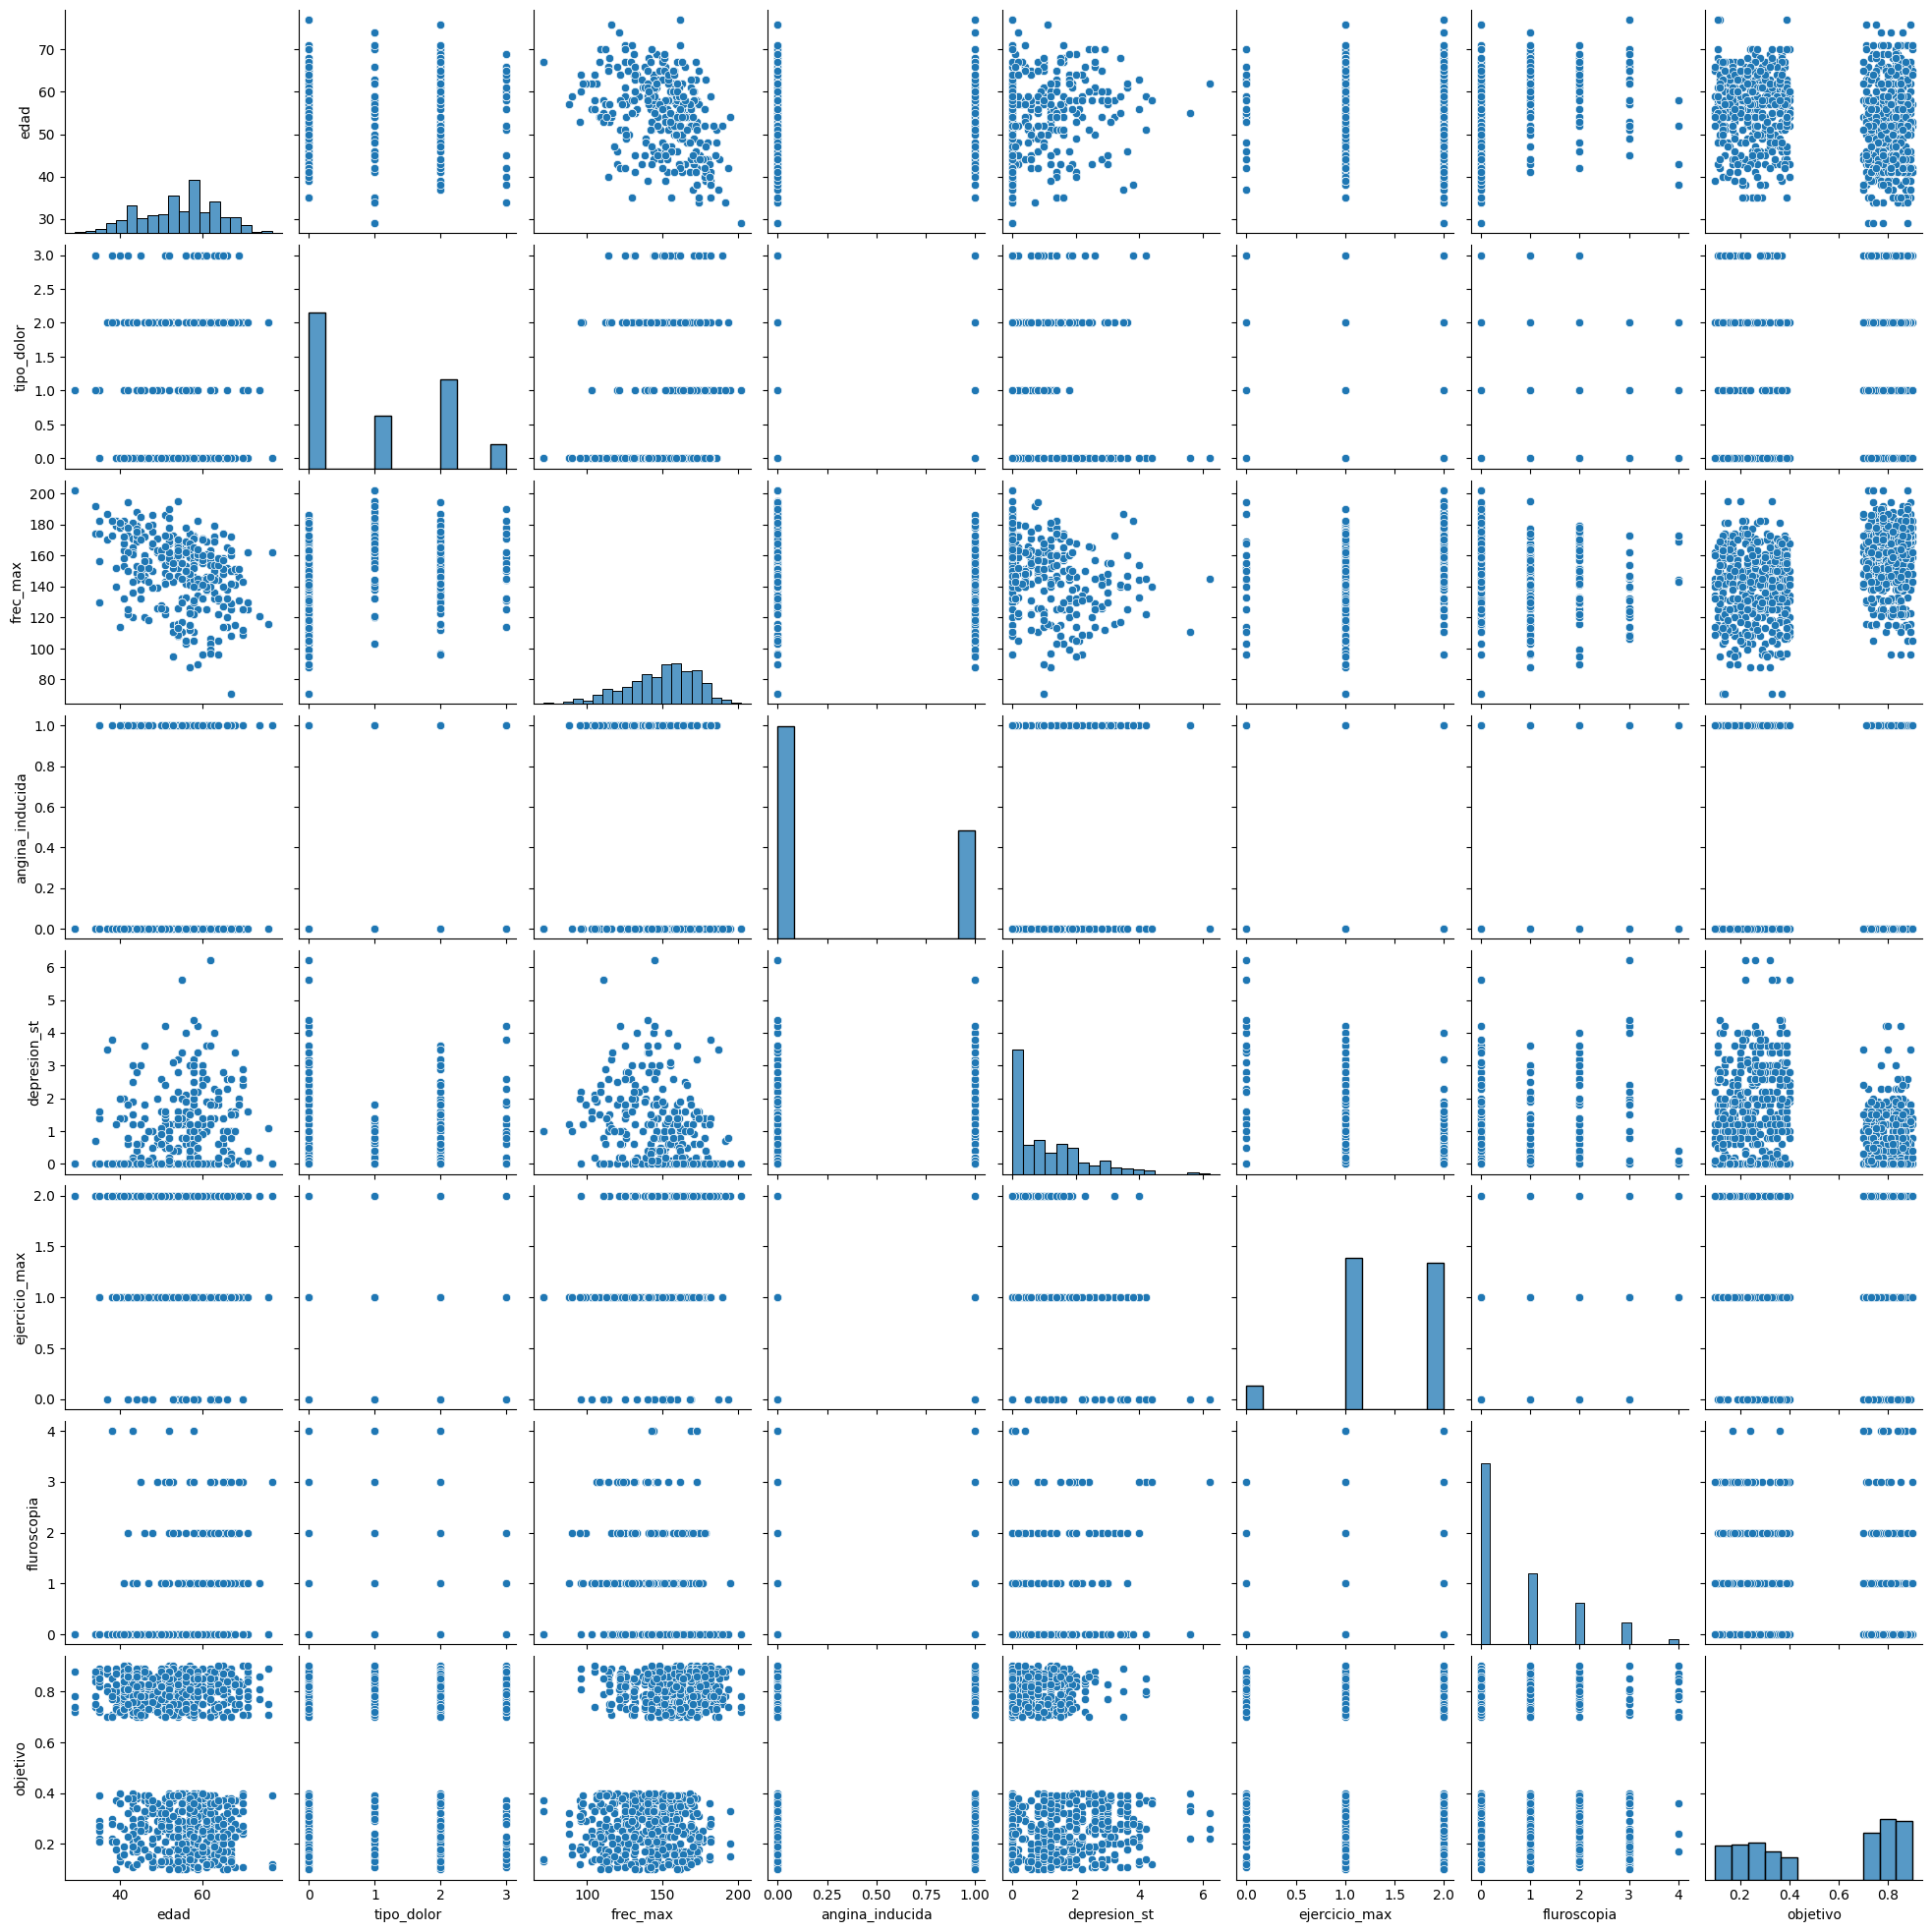

In [ ]:
sns.pairplot(correlacion)
plt.show()

In [ ]:
numerical_col=['edad','presion_art_reposo','colesterol_serico','frec_max','depresion_st','objetivo']

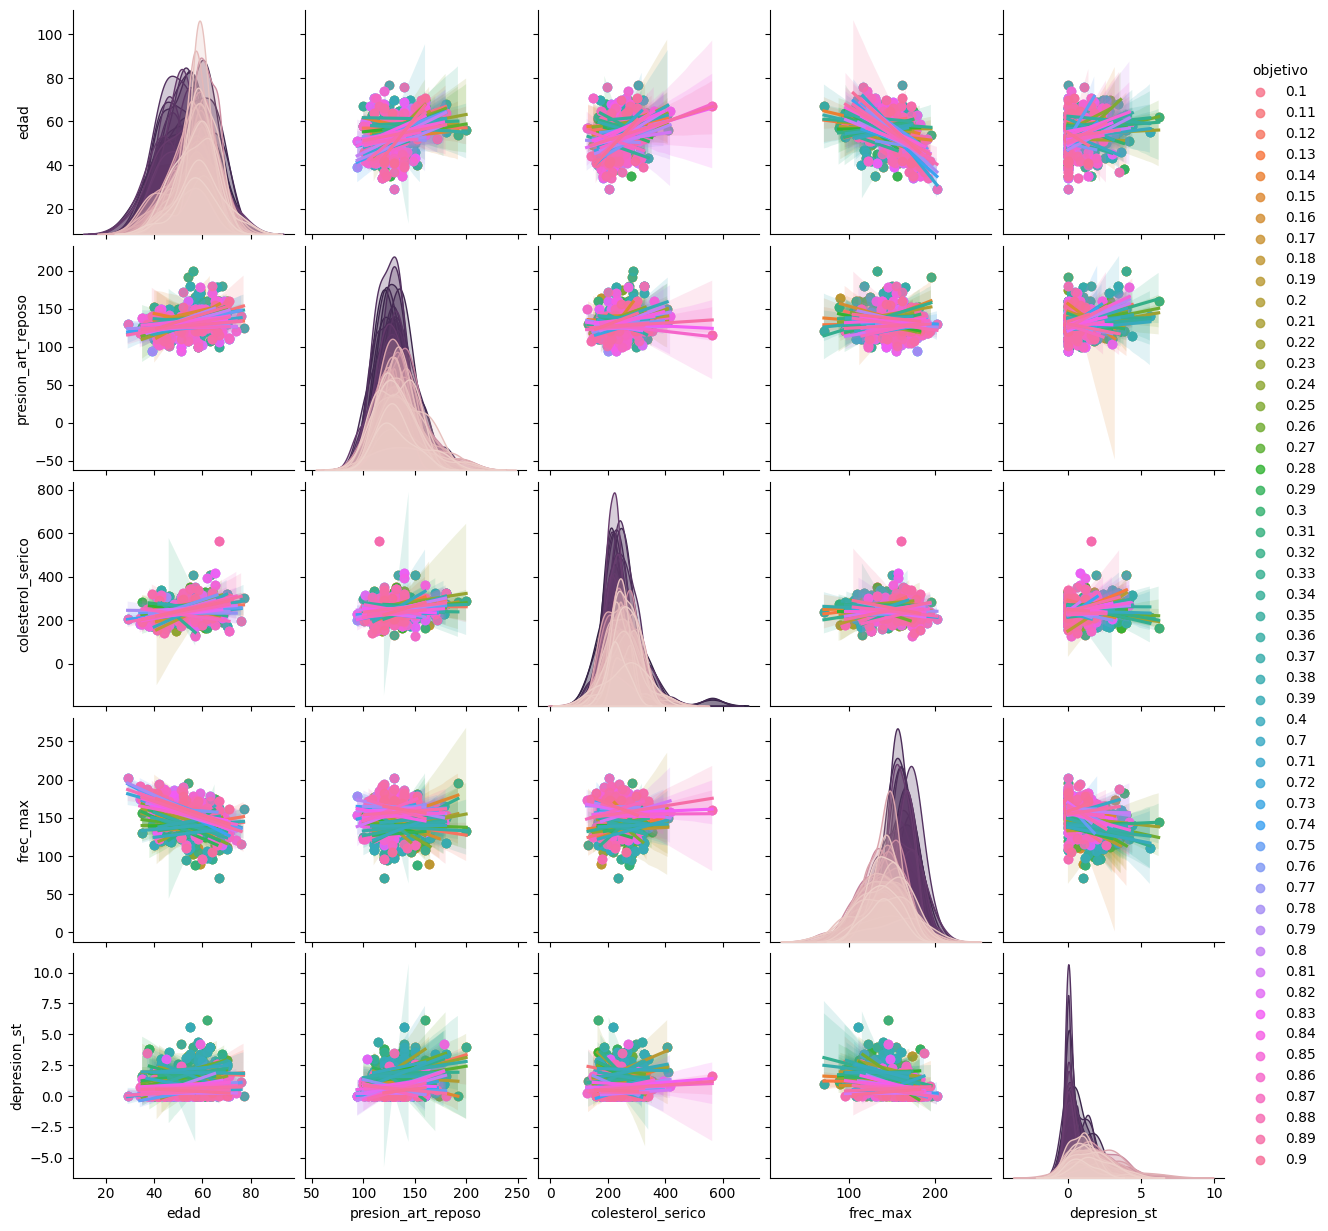

In [ ]:
sns.pairplot(corazon[numerical_col],kind="reg",hue='objetivo')

plt.show()

#### Graficar la correlación nos permite observar que variables pueden ser útiles para regresión linear, sin embargo, antes es necesario realizar algunos ajustes al dataset para proceder a realizar técnicas de predicción.

In [ ]:
bins = [29, 45, 60, 100]
labels = ['joven', 'mediana_edad', 'mayor']
corazon['categoria_edades'] = pd.cut(corazon['edad'], bins=bins, labels=labels, right=False)

#### Hasta ahora el dataset posee dos variables relacionadas, el colesterol serico y la presion arterial, es posible combinar estas variables para tener una variable que posea el riesgo cardiovascular total.

In [ ]:
corazon['riesgo_total'] = corazon['presion_art_reposo'] + corazon['colesterol_serico']

#### Ahora combinamos las variables 'angina_inducida' (angina inducida por el ejercicio) y 'frec_max' (frecuencia cardíaca máxima alcanzada) para crear un indicador binario de la angina inducida por el ejercicio cuando la frecuencia cardíaca está por encima de un cierto umbral.

In [ ]:
umbral_frecuencia_cardiaca = 150
corazon['ejercicio_angina'] = (corazon['angina_inducida'] == 1) & (corazon['frec_max'] > umbral_frecuencia_cardiaca)

#### Calcule la proporción entre el colesterol total y las lipoproteínas de alta densidad (HDL) como factor de riesgo cardiovascular adicional.

In [ ]:
corazon['riesgo_cad_adicional'] = corazon['colesterol_serico'] / corazon['frec_max']

#### Convertir los valores objetivo en 1 y 0 para usarlos en el modelo de aprendizaje automático.

In [ ]:
corazon['objetivo'] = corazon['objetivo'].apply(lambda x: 1 if x >= 0.5 else 0)

# ▶ Métodos de clasificación

#### Selección de datos de entrada y de salida
* Datos de entrada: edad, sexo, colesterol sérico, presión arterial en reposo, frecuencia cardiaca máxima, alcanzada, angina inducida por ejercicio, depresión st.
* Datos de salida: solo se eligió la variable objetivo que indica la posibilidad de sufrir complicaciones cardiacas graves.

* [Bitacora](https://docs.google.com/document/d/1-iv0XqfN8rDNm1TpOWafUYLayYS9cl0H/edit?usp=sharing&ouid=110144158149821392976&rtpof=true&sd=true)

In [ ]:
X = corazon[['edad', 'sexo', 'colesterol_serico', 'presion_art_reposo', 'frec_max', 'angina_inducida', 'depresion_st']]
y = corazon['objetivo']

#### Separar el conjunto de datos en entrenamiento y prueba (70%/30%), esta separación de datos se utilizara en todos los modelos, para poder evaluar el funcionamiento de los mismos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##▶ Evaluación de modelos.

#### Matriz de confusión: Esta matriz muestra un resumen de los resultados de la clasificación comparando las predicciones del modelo con los valores verdaderos (o etiquetas reales) de los datos.



                        TN  FP
                        FN  TP


#### La matriz de confusión es una tabla con cuatro celdas, que representan lo siguiente:
* Verdaderos positivos (TP): Estos son los casos en los que el modelo predijo correctamente que la muestra pertenece a la clase positiva.
* Verdaderos negativos (TN): Estos son los casos en los que el modelo predijo correctamente que la muestra no pertenece a la clase positiva.
* Falsos positivos (FP): Estos son los casos en los que el modelo predijo incorrectamente que la muestra pertenece a la clase positiva cuando en realidad no lo hace. También se conocen como errores de Tipo I.
* Falsos negativos (FN): Estos son los casos en los que el modelo predijo incorrectamente que la muestra no pertenece a la clase positiva cuando en realidad sí lo hace. También se conocen como errores de Tipo II.

Una vez que tienes la matriz de confusión se puede calcular una variedad de métricas de rendimiento del modelo, incluyendo:
* Precisión (Accuracy): Proporción de predicciones correctas en general.
* Precisión (Precision): Proporción de verdaderos positivos respecto a todas las predicciones positivas.
* Sensibilidad (Recall o Tasa de verdaderos positivos): Proporción de verdaderos positivos respecto a todos los valores verdaderos positivos.
* Especificidad: Proporción de verdaderos negativos respecto a todos los valores verdaderos negativos.

##▶ Regresion linear

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Lr_model = LogisticRegression(random_state=42)

Lr_model.fit(X_train_scaled, y_train)

y_pred = Lr_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy: 0.7467532467532467

Confusion Matrix:
[[115  44]
 [ 34 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       159
           1       0.72      0.77      0.75       149

    accuracy                           0.75       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.75      0.75      0.75       308



#### Validación cruzada

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(random_state=42)

scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.04)


#### Se puede esperar que la precisión del modelo esté en el rango de aproximadamente 0.75 (0.79 - 0.04) a 0.83 (0.79 + 0.04), con un nivel de confianza del 95%. Esto indica que el modelo tiene una precisión moderada, con una varianza relativamente baja entre los pliegues de la validación cruzada.


#### El modelo de regresion linear utilizado no estás ajustando los parámetros directamente como en una regresión lineal ordinaria. En su lugar, utiliza un algoritmo de optimización interno que ajusta los parámetros durante el proceso de entrenamiento para minimizar la función de pérdida. Debido a esto, el funcionamiento del modelo no es muy bueno, la matriz de confusión muestra que el modelo clasifico 44 casos como positivos de forma erronea y 34 casos como negativos de forma erronea.

##▶ Clasificador Random Forest

### Prueba 1


In [ ]:
rfmodel = RandomForestClassifier(n_estimators=800, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print('Accuracy:', accuracy*100)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[148  11]
 [ 11 138]]
True positives: 138
True negatives: 148
False positives: 11
False negative: 11
Accuracy: 92.85714285714286
Precision:92.85714285714286%
Sensibilidad:92.61744966442953%
Especificidad:93.08176100628931%


### Validación cruzada  

In [ ]:
rf_model = RandomForestClassifier(n_estimators=800, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.90 (+/- 0.07)


#### Entonces, en términos prácticos, puedes esperar que la precisión del modelo esté en el rango de aproximadamente 0.83 (0.90 - 0.07) a 0.97 (0.90 + 0.07), con un nivel de confianza del 95%.

### Prueba 2

In [ ]:
rfmodel = RandomForestClassifier(n_estimators=800, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)
rfmodel.fit(X_train, y_train)
y_pred = rfmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print('Accuracy:', accuracy*100)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[155   4]
 [  5 144]]
True positives: 144
True negatives: 155
False positives: 4
False negative: 5
Accuracy: 97.07792207792207
Precision:97.07792207792207%
Sensibilidad:96.64429530201343%
Especificidad:97.48427672955975%


### Validación cruzada  

In [ ]:
rf_model = RandomForestClassifier(n_estimators=800, max_depth=10, min_samples_split=10, min_samples_leaf=1, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.06)


####Por lo tanto, en términos prácticos, puedes esperar que la precisión del modelo esté en el rango de aproximadamente 0.86 (0.92 - 0.06) a 0.98 (0.92 + 0.06), con un nivel de confianza del 95%. Esto indica un modelo con una precisión bastante alta y una varianza relativamente baja entre los pliegues de la validación cruzada.

#### En la bitácora se muestran las distintas pruebas sin embargo, se decidio solo colocar estas dos pruebas para comparar su eficiencia. La prueba 1 obtuvo:
           [148  11]
           [ 11 138]

* Accuracy: 92.85714285714286%
* Precision:92.85714285714286%
* Sensibilidad:92.61744966442953%
* Especificidad:93.08176100628931%

####Mientras la prueba 2 obtuvo:

          [155   4]
          [ 5  144]

* Accuracy: 97.07792207792207
* Precision:97.07792207792207%
* Sensibilidad:96.64429530201343%
* Especificidad:97.48427672955975%

#### El único parámetro que se modifico fue "min_samples_leaf, 5 y 1 respectivamente, este parámetro es el número mínimo de muestras requeridas para estar en un nodo hoja. Un valor más alto puede ayudar a prevenir el sobreajuste. En este sentido podemos observar que aunque la prueba dos tiene mejores valores de Precisión, Sensibilidad y Especificidad, esto puede deberse a un sobre ajuste debido al bajo valor del parámetro.


## ▶ Clasificador DecisionTree

### Prueba 1

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', criterion='gini', random_state=42)

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print('Accuracy:', accuracy*100)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[113  46]
 [ 39 110]]
True positives: 110
True negatives: 113
False positives: 46
False negative: 39
Accuracy: 72.40259740259741
Precision:72.40259740259741%
Sensibilidad:73.8255033557047%
Especificidad:71.0691823899371%


### Validación Cruzada

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, max_features='sqrt', criterion='gini', random_state=42)

scores = cross_val_score(dt_model, X_train, y_train, cv=5)
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy medio de validación cruzada: {:.2f}%".format(mean_accuracy * 100))
print("Desviación estándar de la precisión de validación cruzada: {:.2f}%".format(std_accuracy * 100))

Accuracy medio de validación cruzada: 80.47%
Desviación estándar de la precisión de validación cruzada: 2.64%


### Interpretación de resultados
#### Desviación estándar de la precisión de validación cruzada: 2.64%:

####La desviación estándar del 2.64% indica que hay una variación relativamente baja en la precisión entre los diferentes conjuntos de validación por lo que se tiene un modelo robusto y estable en diferentes particiones de los datos de entrenamiento.

####El modelo tiene una precisión media del 80.47% en datos de validación y muestra una variación relativamente baja en la precisión entre diferentes folds de validación cruzada, lo que sugiere que es bastante estable y generaliza bien a datos no vistos.

### Prueba 2

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=15, min_samples_leaf=10, max_features='sqrt', criterion='entropy', random_state=42)

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print('Accuracy:', accuracy*100)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[144  15]
 [ 41 108]]
True positives: 108
True negatives: 144
False positives: 15
False negative: 41
Accuracy: 81.81818181818183
Precision:81.81818181818183%
Sensibilidad:72.48322147651007%
Especificidad:90.56603773584906%


###Validación Cruzada

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=15, min_samples_leaf=10, max_features='sqrt', criterion='gini', random_state=42)

scores = cross_val_score(dt_model, X_train, y_train, cv=5)
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy medio de validación cruzada: {:.2f}%".format(mean_accuracy * 100))
print("Desviación estándar de la precisión de validación cruzada: {:.2f}%".format(std_accuracy * 100))

Accuracy medio de validación cruzada: 77.40%
Desviación estándar de la precisión de validación cruzada: 3.98%


### Interpretación de resultados
#### El modelo tiene una precisión media del 77.40% en datos de validación, con una variabilidad moderada en la precisión entre diferentes pliegues. Esto sugiere que el modelo puede tener un rendimiento aceptable, pero puede ser sensible a la forma en que se dividen los datos para la validación cruzada.

## ▶ Naïve Bayes

### Verificar que se tiene una distribución Gaussiana

In [ ]:
def plot_histograms(df, columns, bins=30):
    num_cols = len(columns)
    fig, axs = plt.subplots(num_cols, 1, figsize=(2, 1.5*num_cols))
    for i, col in enumerate(columns):
        axs[i].hist(df[col], bins=bins)
        axs[i].set_xlabel('Valor de {}'.format(col))
        axs[i].set_ylabel('Frecuencia')
        axs[i].set_title('Histograma de {}'.format(col))
    plt.tight_layout()
    plt.show()


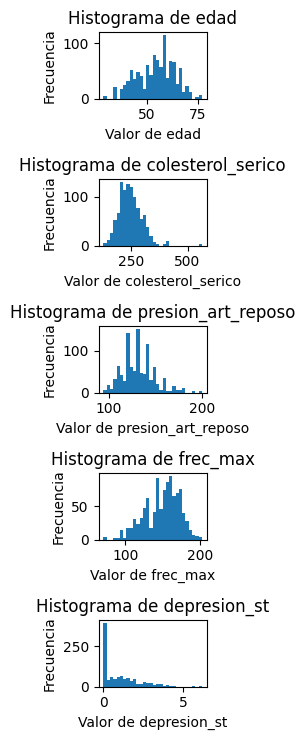

In [ ]:

columnas = ['edad', 'colesterol_serico', 'presion_art_reposo', 'frec_max', 'depresion_st']

plot_histograms(corazon, columnas)

### Prueba 1

In [ ]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
y_pred = NaiveBayes.predict(X_test)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print('Accuracy:', accuracy*100)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[119  40]
 [ 24 125]]
True positives: 125
True negatives: 119
False positives: 40
False negative: 24
Accuracy: 81.81818181818183
Precision:79.22077922077922%
Sensibilidad:83.89261744966443%
Especificidad:74.84276729559748%


### Validación cruzada

In [ ]:
NaiveBayes = GaussianNB()

scores = cross_val_score(NaiveBayes, X_train, y_train)

mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy medio de validación cruzada: {:.2f}%".format(mean_accuracy * 100))
print("Desviación estándar de la precisión de validación cruzada: {:.2f}%".format(std_accuracy * 100))

Accuracy medio de validación cruzada: 79.22%
Desviación estándar de la precisión de validación cruzada: 3.26%


### Interpretación de resultados
####  El modelo tiene una precisión media del 79.22% en datos de validación, con una variabilidad moderada en la precisión entre diferentes pliegues de validación cruzada. Esto sugiere que el modelo generaliza bien a datos no vistos, aunque hay cierta variabilidad en su rendimiento.

### Prueba 2

In [ ]:
NaiveBayes = GaussianNB(var_smoothing=1e-9)

X_train_transformed = np.log(X_train + 1)
X_test_transformed = np.log(X_test + 1)

selector = SelectKBest(score_func=chi2, k=7)
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
X_test_selected = selector.transform(X_test_transformed)

NaiveBayes.fit(X_train_selected, y_train)

y_pred = NaiveBayes.predict(X_test_selected)


def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

resultado = confusion_matrix(y_test, y_pred)
print(resultado)
(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN))

acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print('Accuracy:', accuracy*100)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

[[120  39]
 [ 25 124]]
True positives: 124
True negatives: 120
False positives: 39
False negative: 25
Accuracy: 81.81818181818183
Precision:79.22077922077922%
Sensibilidad:83.22147651006712%
Especificidad:75.47169811320755%


### Validación cruzada

In [ ]:
NaiveBayes = GaussianNB()

scores = cross_val_score(NaiveBayes, X_train_selected, y_train, cv=7)

mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Accuracy medio de validación cruzada: {:.2f}%".format(mean_accuracy * 100))
print("Desviación estándar de la precisión de validación cruzada: {:.2f}%".format(std_accuracy * 100))


Accuracy medio de validación cruzada: 78.10%
Desviación estándar de la precisión de validación cruzada: 2.62%


#### El modelo tiene una precisión media del 78.10% en los datos de validación, con una moderada variabilidad en la precisión entre diferentes pliegues de validación cruzada. Esto sugiere que el modelo generaliza razonablemente bien a datos no vistos, aunque existe cierta variabilidad en su rendimiento.

## ▶ Máquina de Soporte Vectorial

In [ ]:
SupportVectorMachine = SVC()
SupportVectorMachine.fit(X_train, y_train)
y_pred_svm = SupportVectorMachine.predict(X_test)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

evaluar(y_test, y_pred_svm)


[[100  59]
 [ 43 106]]
True positives: 106
True negatives: 100
False positives: 59
False negative: 43
Precision:66.88311688311688%
Sensibilidad:71.14093959731544%
Especificidad:62.893081761006286%


### Validación cruzada

In [ ]:
SupportVectorMachine = SVC()

scores = cross_val_score(SupportVectorMachine, X_train, y_train, cv=5)

mean_accuracy = np.mean(scores)*100
std_accuracy = np.std(scores)*100

print("Accuracy medio de validación cruzada:{:.2f}%".format(mean_accuracy))
print("Desviación estándar de la precisión de validación cruzada:{:.2f}%".format(std_accuracy))



Accuracy medio de validación cruzada:69.17%
Desviación estándar de la precisión de validación cruzada:3.22%


#### Los resultados sugieren que el modelo SVM tiene un rendimiento promedio del 69.17% en la clasificación de los datos de prueba, con una consistencia moderada representada por la desviación estándar del 3.22%.
#### Debido a la naturaleza del clasificador se considera no apropiado para el dataset.

## ▶ Redes Neuronales Artificiales

### Prueba 1

In [ ]:
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)
NeuralNetwork.fit(X_train, y_train)
y_pred_nn = NeuralNetwork.predict(X_test)

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")


In [ ]:
evaluar(y_test, y_pred_nn)

[[128  31]
 [ 34 115]]
True positives: 115
True negatives: 128
False positives: 31
False negative: 34
Precision:78.8961038961039%
Sensibilidad:77.18120805369128%
Especificidad:80.50314465408806%


### Validación cruzada

In [ ]:
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10, 4),
                              max_iter=20000,
                              activation='logistic',
                              tol=1e-8)

scores = cross_val_score(NeuralNetwork, X_train, y_train, cv=5)

mean_accuracy = np.mean(scores)*100

std_accuracy = np.std(scores)*100

print("Accuracy medio de validación cruzada:{:.2f}%".format(mean_accuracy))
print("Desviación estándar de la precisión de validación cruzada:{:.2f}%".format(std_accuracy))


Accuracy medio de validación cruzada:80.76%
Desviación estándar de la precisión de validación cruzada:3.19%


#### Los resultados sugieren que el modelo MLP tiene un rendimiento promedio del 80.76% en la clasificación de los datos de prueba, con una consistencia moderada representada por la desviación estándar del 3.19%. Este rendimiento es significativamente mejor que el modelo SVM que se discutió anteriormente.

###Prueba 2

In [ ]:
parameters = {
    'hidden_layer_sizes': [(10,), (20,), (10, 5), (20, 10)],
    'activation': ['logistic', 'tanh', 'relu'],
    'max_iter': [1000, 5000, 100000],
    'tol': [1e-2, 1e-4, 1e-6],
    'solver': ['adam']
}

NeuralNetwork = MLPClassifier()

grid_search = GridSearchCV(NeuralNetwork, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Mejores parámetros encontrados:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")


Mejores parámetros encontrados: {'activation': 'logistic', 'hidden_layer_sizes': (20, 10), 'max_iter': 100000, 'solver': 'adam', 'tol': 0.0001}


In [ ]:
evaluar(y_test, y_pred_nn)

[[128  31]
 [ 34 115]]
True positives: 115
True negatives: 128
False positives: 31
False negative: 34
Precision:78.8961038961039%
Sensibilidad:77.18120805369128%
Especificidad:80.50314465408806%


##Validación cruzada

In [ ]:
parameters = {
    'hidden_layer_sizes': [(10,), (20,), (10, 5), (20, 10)],
    'activation': ['logistic', 'tanh', 'relu'],
    'max_iter': [1000, 5000, 100000],
    'tol': [1e-2, 1e-4, 1e-6],
    'solver': ['adam']
}

NeuralNetwork = MLPClassifier()

grid_search = GridSearchCV(NeuralNetwork, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores parámetros encontrados:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Mejores parámetros encontrados: {'activation': 'logistic', 'hidden_layer_sizes': (10, 5), 'max_iter': 100000, 'solver': 'adam', 'tol': 1e-06}


##▶Conclusiones
### El dataset es viejo y con pocos datos, contar con un mejor dataset, más completo y actualizado permitira tener mejores predicciones.

### El modelo que mejor evaluación presento fue la Prueba 2 de Random Forest con los siguientes valores:
          [155   4]
          [ 5  144]

* Accuracy: 97.07792207792207
* Precision:97.07792207792207%
* Sensibilidad:96.64429530201343%
* Especificidad:97.48427672955975%


### Mientras la Prueba 1 obtuvo:
    [[148  11]
    [ 11 138]]

* Accuracy: 92.85714285714286
* Precision:92.85714285714286%
* Sensibilidad:92.61744966442953%
* Especificidad:93.08176100628931%

####Estos valores deben analizarse en el contexto, ya que si estamos tratando de predecir la posibilidad de un ataque cardiaco, no es coveniente clasificar casos como falso negativos ya que podria llevar a consecuencias fatales, por otro lado si tomamos la Prueba 1, tenemos que el parametro  "min_samples_leaf" = 1, este bajo valor en el parametro podria ocasionar un sobre ajuste que este afectando el modelo.

#### En conclusion se requiere un dataset más grande en el que se incluyan pacientes diversos para evitar sesgos y conocer mayor detalle de algunas variables como la presion arterial, para poder modelar de forma precisa si se tiene o no riesgo de sufrir un infarto.





#**Sistema de Procesamiento de Imágenes con ML**

Importacion de librerias para poder procesar nuestra imagen del Waffle.

In [ ]:
import cv2 # Librería para porder visualizar y procesar imágenes.
import numpy as np
from matplotlib import pyplot as plt


Cargar la imagen: Utiliza OpenCV para cargar la imagen desde una ubicación.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/My Drive/PROYECTO2/waffle.jpeg'

In [ ]:
imageOpenCV = cv2.imread("waffle.jpeg", cv2.IMREAD_COLOR)

In [ ]:
image = cv2.imread(image_path)

In [ ]:
# Verificar si la imagen se ha cargado correctamente
if imageOpenCV is None:
    print("Error al cargar la imagen")
else:
    # Mostrar la imagen usando matplotlib
    plt.imshow(cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Desactivar los ejes
    plt.show()

Error al cargar la imagen


Dividir la imagen en canales de color: Separa la imagen en sus componentes de color rojo, verde y azul.

In [ ]:
# Extracion de colores
rojo_canal = image[:,:,2]
verde_canal = image[:,:,1]
azul_canal = image[:, :, 0]

Mostrar nuestra imagen.

<class 'numpy.ndarray'>
Tamaño de la imagen: (alto, ancho, canales)
(4160, 3120, 3)


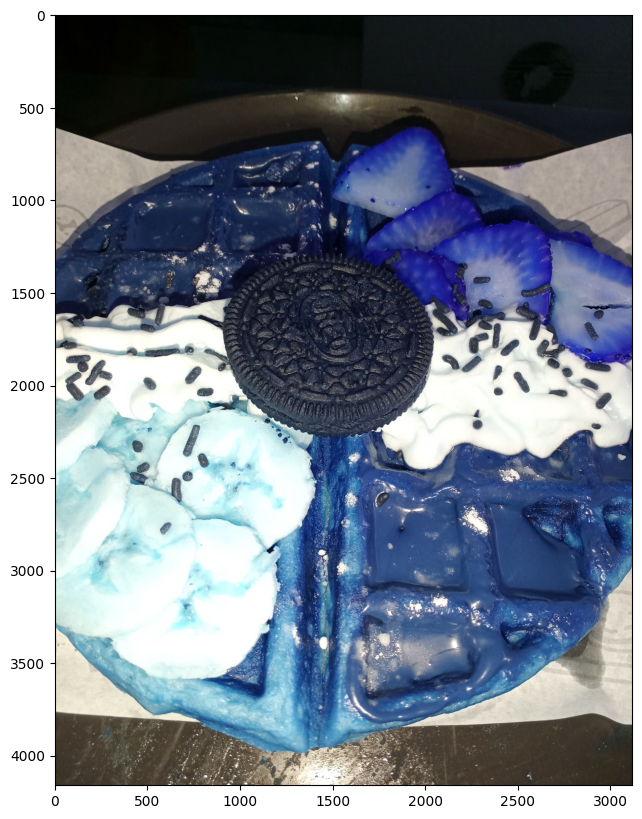

In [ ]:
print(type(image))
print("Tamaño de la imagen: (alto, ancho, canales)")
print(image.shape)
plt.figure(figsize=(10,10))
plt.imshow(image)

Text(0.5, 1.0, 'Imagen Original')

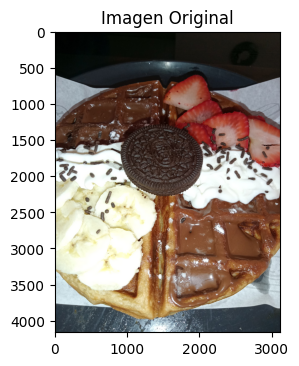

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')

Mostraremos los conales en azul, verde y rojo, que nos ayudara mas adelante hacer la mazcla de colores.

(4160, 3120)
(4160, 3120, 3)


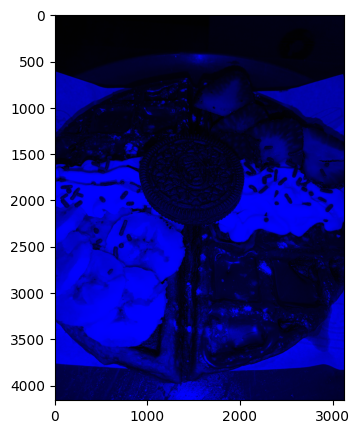

In [ ]:
azul_canal = image[:, :, 0]
print(azul_canal.shape)

dummy_channel = np.ones_like(azul_canal)
img_canal_azul = np.dstack((dummy_channel, dummy_channel,azul_canal))

print(img_canal_azul.shape)
plt.figure(figsize=(5,5))
plt.imshow(img_canal_azul)

(4160, 3120)
(4160, 3120, 3)


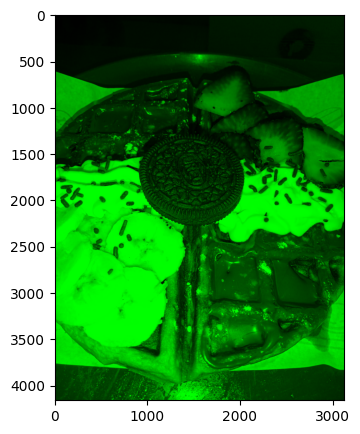

In [ ]:
verde_canal = image[:,:,1]
print(verde_canal.shape)

dummy_channel = np.zeros_like(verde_canal)
img_canal_verde = np.dstack((dummy_channel, verde_canal, dummy_channel))

print(img_canal_verde.shape)
plt.figure(figsize=(5,5))
plt.imshow(img_canal_verde)

(4160, 3120)
(4160, 3120, 3)


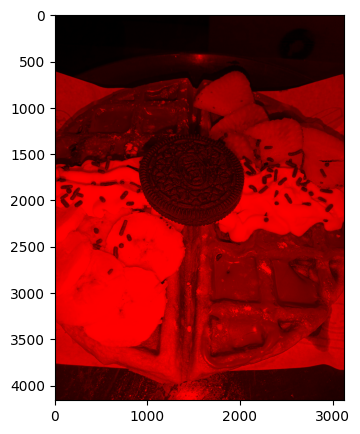

In [ ]:
rojo_canal = image[:,:,2]
print(rojo_canal.shape)

dummy_channel = np.zeros_like(rojo_canal)
img_canal_rojo = np.dstack((rojo_canal, dummy_channel, dummy_channel))

print(img_canal_rojo.shape)
plt.figure(figsize=(5,5))
plt.imshow(img_canal_rojo)

(4160, 3120, 3)


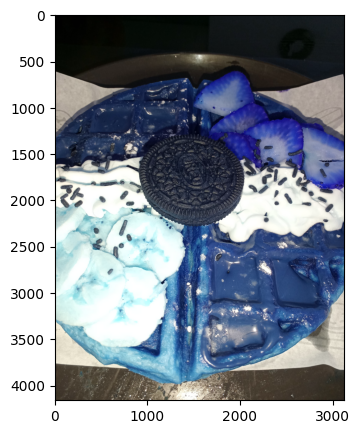

In [ ]:
imagen_reconstruida = np.dstack((azul_canal, verde_canal, rojo_canal))

print(imagen_reconstruida.shape)
plt.figure(figsize=(5,5))
plt.imshow(imagen_reconstruida)

Mostramos nuestra imagen en blnco y negro.

(4160, 3120)


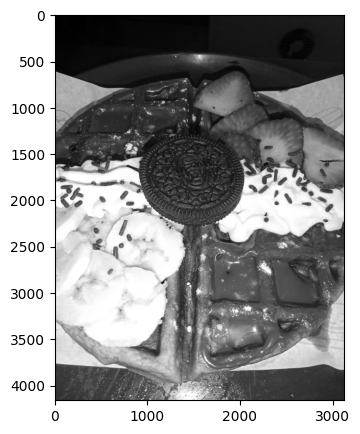

In [ ]:
imagen_grayscale = np.sum(image,axis = 2)
imagen_grayscale = imagen_grayscale / 3
print(imagen_grayscale.shape)
plt.figure(figsize=(5,5))
plt.imshow(imagen_grayscale,cmap=plt.cm.gray)

In [ ]:
rojo_canal = image[:,:,2]
verde_canal = image[:,:,1]
azul_canal = image[:,:,0]

#Volveremos los canales que ignoramos a 0.
canalApagado = np.zeros_like(rojo_canal)

Mostramos la mezcla de colores de los canales rojos y azul para obtener mi color favorito Magenta.

(4160, 3120, 3)


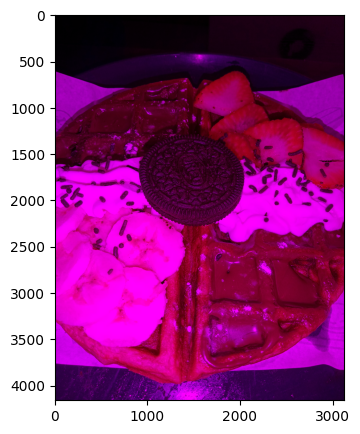

In [ ]:
#Canal Rojo y Azul
img_canal_rojoazul = np.dstack((rojo_canal, canalApagado, azul_canal))
print(img_canal_rojoazul.shape)
plt.figure(figsize=(5,5))
plt.imshow(img_canal_rojoazul)

**Histograma de colores.**
--


> Lo utilizamos para visualizar la distribución de los valores de los canales de color de nuestra imagen.

In [ ]:
def crearHistograma(imagen):
    histograma = np.zeros((256))
    imgEnArray = np.ravel(imagen)
    for counter in range(0, len(imgEnArray)):
        histograma[int(imgEnArray[counter])]+=1

    return histograma

histograma = crearHistograma(image[:,:,0])
print("Color mas usado:"+str(np.argmax(histograma))+". Usado "+str(np.max(histograma))+" veces.")

Color mas usado:255. Usado 449144.0 veces.


In [ ]:
# Crear histogramas para cada canal
histogramaRojo = crearHistograma(rojo_canal)
histogramaVerde = crearHistograma(verde_canal)
histogramaAzul = crearHistograma(azul_canal)

In [ ]:
# Combinar los histogramas en uno solo
histograma = np.concatenate((histogramaRojo, histogramaVerde, histogramaAzul))

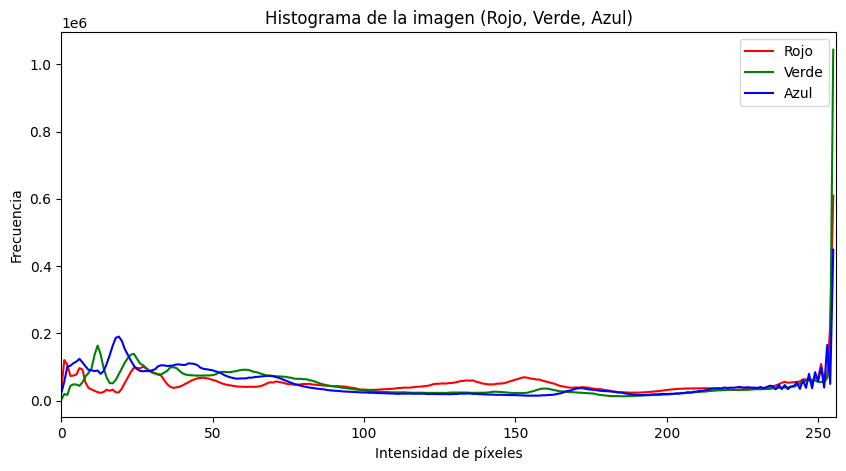

In [ ]:
# Mostrar histograma para cada canal
plt.figure(figsize=(10, 5))
plt.title('Histograma de la imagen (Rojo, Verde, Azul)')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')

plt.plot(histogramaRojo, label='Rojo', color='red')
plt.plot(histogramaVerde, label='Verde', color='green')
plt.plot(histogramaAzul, label='Azul', color='blue')

plt.xlim([0, 256])
plt.legend()
plt.show()

Interpretacion del Histograma: cabe mencionar que el color mas usado es 255 y a sido usado 449144.0 veces, por lo tanto esto se refleja en el histogrma donde los picos son mas alto que se encuentra al final de nuestro grafico.